In [127]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import rasterio as rio
import matplotlib.pyplot as plt

import os

In [128]:
tf.__version__


'2.4.3'

In [129]:
# cd into project directory
proj_path = '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/workspace'   # ---------------> Define path please!!!
os.chdir(proj_path)
train_dir = proj_path + '/training'
test_dir = proj_path + '/testing'

# loading in dir paths for training and testing folders within project
folders_in = os.listdir()

training_mine_dir = train_dir + '/' + 'mine_img'    # dir training class = 1
training_notmine_dir = train_dir + '/' + 'not_mine_img'   # dir training class = 0

testing_mine_dir = test_dir + '/' + 'mine_img'      # dir testing class = 1
testing_notmine_dir = test_dir + '/' + 'not_mine_img'     # dir testing class = 0


# checking if final paths actually exist
if not os.path.isdir(training_mine_dir):
    print(training_mine_dir,'   --------- > is not a directory!!!')
    
elif not os.path.isdir(training_notmine_dir):
    print(training_notmine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_mine_dir):
    print(testing_mine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_notmine_dir):
    print(testing_notmine_dir,'   --------- > is not a directory!!!')
    
    
    

In [130]:
# defining training and testing ImageDataGenerators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=10
                                                       )

test_datagen = ImageDataGenerator( horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=10
                                                       )


# defining training and testing generators from ImageDataGenerator objects
train_generator = train_datagen.flow_from_directory( train_dir,
                                                     batch_size = 4,
                                                     class_mode = 'binary',
                                                     #color_mode = 'grayscale',
                                                     target_size = (50,50), 
                                                                           )

test_generator = test_datagen.flow_from_directory( test_dir,
                                                   batch_size = 4,
                                                   class_mode = 'binary',
                                                   #color_mode = 'grayscale',
                                                   target_size = (50,50),
                                                                           ) 


Found 9 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [131]:
# writing CNN architecture

model = tf.keras.models.Sequential([
        # first layer
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (50,50,1)),  # 1st Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 1st Max Pooling
    
        # second layer
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),  # 2nd Convolution 
        tf.keras.layers.MaxPooling2D(2,2),  # 2nd Max Pooling
    
        # third layer
        tf.keras.layers.Conv2D(128, (2,2), activation = 'relu'),  # 3rd Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 3rd Max Pooling
    
        # flat
        tf.keras.layers.Flatten(),
        
        # Dense
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    
])


# compiling the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['acc'])



# The loss function that will be used = binary cross entropy
LOSS = 'binary_cross_entropy'
model.summary()


#from PIL import Image
import scipy
history = model.fit_generator(train_generator,
                            validation_data = test_generator,
                            steps_per_epoch = 10,
                            epochs = 30,
                            #validation_steps = 50,
                            #callbacks = [callbacks],
                            verbose = 2)# Your Code Here (set e

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 128)       65664     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)             

/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1839: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f00ac5f64f0>

In [132]:
mine_path


'/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/workspace/training/mine_img/mine__2.tif'

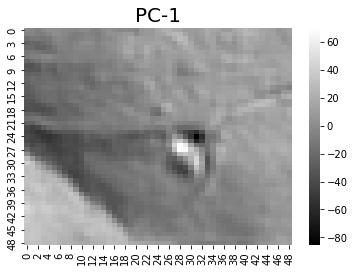

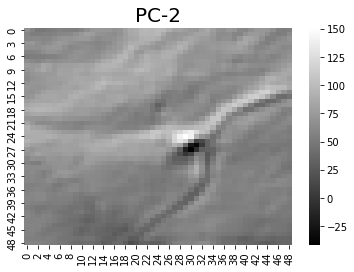

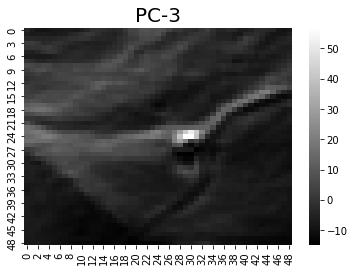

In [136]:
### Opening raster and extracting np.array

def get_array(path):

    rast = rio.open(mine_path)
    mine = rast.read()
    rast.close()
    
    return mine

# paths for a function
mine_test = os.listdir(proj_path + '/' + 'training' + '/' + 'mine_img')[0]    # path to a single mine for testing purposes
mine_path = proj_path + '/' + 'training' + '/' + 'mine_img' + '/' +str(mine_test)    # could be any image!!!

# mine np.array
mine = get_array(mine_path)



# looking at mine across all PC bands
color = 'gray' # try other colors like 'turbo' or 'seismic'

# Heatmap of PC-1
sns.heatmap(mine[0,:,:], cmap = color)
plt.title('PC-1', fontsize = 20)
plt.show()

# Heatmap of PC-2
sns.heatmap(mine[1,:,:], cmap = color)
plt.title('PC-2', fontsize = 20)
plt.show()

# Heatmap of PC-3
sns.heatmap(mine[2,:,:], cmap = color)
plt.title('PC-3', fontsize = 20)
plt.show()




### 

In [137]:
# current data type is float64. We need these arrays to be 8-bits for tensorflow. Therefore quantize or lowering precision is needed.
mine.dtype

# first we must split the arrays along R,G,B channels to best visualize process

#### Method 1) Kmeans









dtype('float64')

In [395]:
image = mine

rows = image.shape[1]
cols = image.shape[2]
  
image = image.reshape(image.shape[2]*image.shape[1],3)
kmeans = KMeans(n_clusters = 255, n_init=20, max_iter=200)
kmeans.fit(image)
 
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8)  
labels = labels.reshape(rows,cols)

<AxesSubplot:>

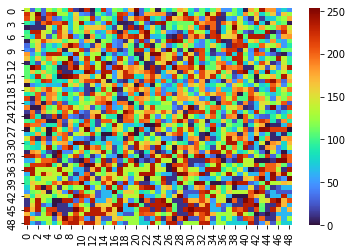

In [396]:
sns.heatmap(labels,cmap='turbo')

In [397]:
centers = clusters
c_image = labels
 
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8)
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

In [401]:
image.shape

(49, 49, 3)

<AxesSubplot:>

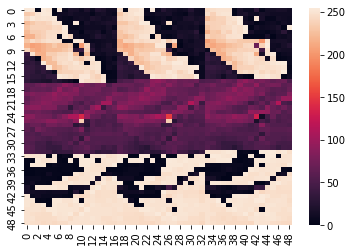

In [402]:
sns.heatmap(image[:,:,0])


In [217]:
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.cluster import KMeans

# first we must split the arrays along R,G,B channels to best visualize process

#### Method 1) Kmeans
red = mine[0,:,:]
green = mine[1,:,:]
blue = mine[2,:,:]


def kmeans_compressor(arr_float64):
    pass

max_dim = max(mine.shape)


R_kmeans = KMeans(n_clusters = 49,init='k-means++')

red_cmprs = R_kmeans.fit(mine)



ValueError: Found array with dim 3. Estimator expected <= 2.

<AxesSubplot:>

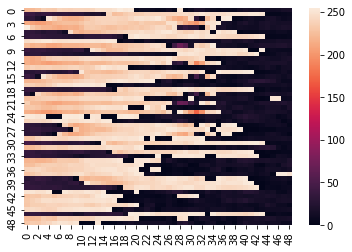

In [216]:
cmprs_image = red_cmprs.labels_.astype('int8')
clusters = np.asarray(R_kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(R_kmeans.labels_,dtype=np.uint8 )

sns.heatmap(clusters)

In [214]:
centers = labels
c_image = clusters
 
image = np.zeros((c_image.shape[0],c_image.shape[1],0),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [212]:
c_image.shape[0]


49

In [422]:
### QUANTIZE

mine_tf = tf.convert_to_tensor(
    value = mine,
    dtype=tf.float32,
    #dtype_hint=None,
    #name=None
)






In [463]:
quant = tf.quantization.quantize(
    input = mine_tf,
    min_range = mine.min(), 
    max_range = mine.max(), 
    T = tf.qint8, 
    mode='SCALED',
    #round_mode='HALF_AWAY_FROM_ZERO', 
    #name=None, 
    #narrow_range=False,
    #axis=None, 
    ensure_minimum_range=0.00
)


AttributeError: 'QuantizeV2' object has no attribute 'asarray'

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [464]:
type(quant[0])

tensorflow.python.framework.ops.EagerTensor

AttributeError: 'QuantizeV2' object has no attribute 'tensor_shape'

In [467]:
butt= quant[0].numpy()

<AxesSubplot:>

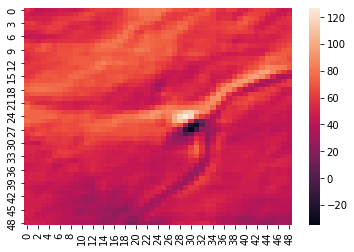

In [479]:
sns.heatmap(butt[1,:,:])


<AxesSubplot:>

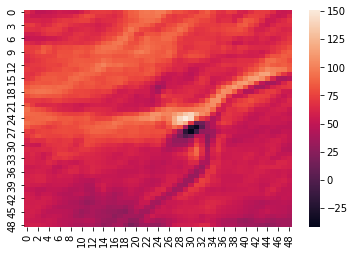

In [478]:
sns.heatmap(mine[1,:,:])